#**PUC MG - Pontifícia Universidade Católica de Minas Gerais**
Pós-Graduação em Ciência de Dados e Big Data

TRABALHO DE CONCLUSÃO DE CURSO

TÍTULO: Modelos Preditivos Utilizando Séries Temporais da Fórmula 1

ALUNO: Mário Marcos Martins de Souza

## **Projeto F1_World**

### Importando as Bibliotecas

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import datetime

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import plotly.graph_objects as go

In [ ]:
import plotly.express as px

In [ ]:
import seaborn as sns

In [ ]:
!pip install pmdarima
#Bibliotecas para utilização do ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
import pmdarima as pm

In [ ]:
#Bibliotecas para utilização das métricas do Sklearn
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Bibliotecas para utilização do Keras
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import LSTM, SimpleRNN, Dense, Dropout, Masking, Embedding

###Acesso ao drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Adicionando os caminhos dos arquivos e criando os dataframe e importando os arquivos CSV.


In [ ]:
circuits = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/circuits.csv')

In [ ]:
constructor_results = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/constructor_results.csv')

In [ ]:
constructor_standings = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/constructor_standings.csv')

In [ ]:
constructors = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/constructors.csv')

In [ ]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [ ]:
driver_standings = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/driver_standings.csv')

In [ ]:
drivers_raw_df = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/drivers.csv')

In [ ]:
drivers_raw_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
lap_times = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/lap_times.csv')

In [ ]:
pit_stops = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/pit_stops.csv')

In [ ]:
qualifying = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/qualifying.csv')

In [ ]:
races = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/races.csv')

In [ ]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
results = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/results.csv')

In [ ]:
#results.head()
results.tail()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,6
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130
25839,25845,1096,4,214,14,10,\N,R,20,0.0,27,\N,\N,24,17,1:30.579,209.889,47


In [ ]:
seasons = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/seasons.csv')

In [ ]:
sprint_results = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/sprint_results.csv')

In [ ]:
status = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Kaggle_F1_world/status.csv')

###Fazendo merge para os datasets de Teste e Treinamento.


In [ ]:
###Merge para o dataset de treinamento de 2018 até 2022 
races_2018_2022_train = races[races['year']>=2018]
races_2018_2022_train = races_2018_2022_train.merge(results, left_on='raceId', right_on='raceId', how='inner')
races_2018_2022_train = races_2018_2022_train.merge(drivers_raw_df, left_on='driverId', right_on='driverId', how='inner')

In [ ]:
###Amostra os 5 primeiros registros do dataset de treinamento
races_2018_2022_train.head(1000)

,raceId,year,round,circuitId,name,date,time_x,url_x,fp1_date,fp1_time,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,989,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,http://en.wikipedia.org/wiki/2018_Australian_G...,\N,\N,...,220.782,1,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
1,990,2018,2,3,Bahrain Grand Prix,2018-04-08,15:10:00,http://en.wikipedia.org/wiki/2018_Bahrain_Gran...,\N,\N,...,206.274,1,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
2,991,2018,3,17,Chinese Grand Prix,2018-04-15,06:10:00,http://en.wikipedia.org/wiki/2018_Chinese_Gran...,\N,\N,...,201.311,1,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
3,992,2018,4,73,Azerbaijan Grand Prix,2018-04-29,12:10:00,http://en.wikipedia.org/wiki/2018_Azerbaijan_G...,\N,\N,...,204.783,1,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
4,993,2018,5,4,Spanish Grand Prix,2018-05-13,13:10:00,http://en.wikipedia.org/wiki/2018_Spanish_Gran...,\N,\N,...,211.783,1,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1081,2022,8,73,Azerbaijan Grand Prix,2022-06-12,11:00:00,http://en.wikipedia.org/wiki/2022_Azerbaijan_G...,2022-06-10,11:00:00,...,199.551,1,ocon,31,OCO,Esteban,Ocon,1996-09-17,French,http://en.wikipedia.org/wiki/Esteban_Ocon
996,1082,2022,9,7,Canadian Grand Prix,2022-06-19,18:00:00,http://en.wikipedia.org/wiki/2022_Canadian_Gra...,2022-06-17,18:00:00,...,203.600,1,ocon,31,OCO,Esteban,Ocon,1996-09-17,French,http://en.wikipedia.org/wiki/Esteban_Ocon
997,1083,2022,10,9,British Grand Prix,2022-07-03,14:00:00,http://en.wikipedia.org/wiki/2022_British_Gran...,2022-07-01,12:00:00,...,226.729,48,ocon,31,OCO,Esteban,Ocon,1996-09-17,French,http://en.wikipedia.org/wiki/Esteban_Ocon
998,1084,2022,11,70,Austrian Grand Prix,2022-07-10,13:00:00,http://en.wikipedia.org/wiki/2022_Austrian_Gra...,2022-07-08,11:30:00,...,223.476,1,ocon,31,OCO,Esteban,Ocon,1996-09-17,French,http://en.wikipedia.org/wiki/Esteban_Ocon


In [ ]:
###mostra toda de linhas e de colunas do dataset
races_2018_2022_train.shape

(2060, 43)

###Processamento e Tratamento de Dados



In [ ]:
races_2018_2022_train.dtypes

raceId               int64
year                 int64
round                int64
circuitId            int64
name                object
date                object
time_x              object
url_x               object
fp1_date            object
fp1_time            object
fp2_date            object
fp2_time            object
fp3_date            object
fp3_time            object
quali_date          object
quali_time          object
sprint_date         object
sprint_time         object
resultId             int64
driverId             int64
constructorId        int64
number_x            object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time_y              object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
driverRef           object
number_y            object
c

In [ ]:
###Removendo colunas do dataset de treinamento
races_2018_2022_train = races_2018_2022_train.drop(columns=['constructorId',
                                                            'grid', 'position', 'positionText', 'positionOrder', 'laps', 'time_x', 'milliseconds', 'fastestLap', 'fastestLapTime','fastestLapSpeed', 
                                                            'statusId','url_x', 'fp1_date', 'fp1_time','fp2_date','fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 
                                                            'driverRef', 'statusId', 'dob', 'constructorId', 'milliseconds', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'url_y', 'time_y', 'surname',        
                                                            'nationality', 'name', 'resultId', 'number_x','number_y'    
])

In [ ]:
races_2018_2022_train.shape

(2060, 10)

In [ ]:
races_2018_2022_train.dtypes

raceId         int64
year           int64
round          int64
circuitId      int64
date          object
driverId       int64
points       float64
rank          object
code          object
forename      object
dtype: object

###**Análise Exploratória** 

In [ ]:
#dataset de treinamento geral 
train = races_2018_2022_train

In [ ]:
#quantidade de registros e quantidade de colunas
train.shape

(2060, 10)

In [ ]:
#Objetos no dataset
train.dtypes

raceId         int64
year           int64
round          int64
circuitId      int64
date          object
driverId       int64
points       float64
rank          object
code          object
forename      object
dtype: object

In [ ]:
#Amostragem dos registros no dataset
train.head()

,raceId,year,round,circuitId,date,driverId,points,rank,code,forename
0,989,2018,1,1,2018-03-25,20,25.0,4,VET,Sebastian
1,990,2018,2,3,2018-04-08,20,25.0,7,VET,Sebastian
2,991,2018,3,17,2018-04-15,20,4.0,9,VET,Sebastian
3,992,2018,4,73,2018-04-29,20,12.0,4,VET,Sebastian
4,993,2018,5,4,2018-05-13,20,12.0,2,VET,Sebastian


**Datasets dos 3 melhores pilotos entre 2018 e 2022 da fórmula 1**

In [ ]:
#dataset train HAM
train_HAM = train[(train['code']=='HAM')]
#dataset train VER
train_VER = train[(train['code']=='VER')]
#dataset train BOT
train_BOT = train[(train['code']=='BOT')]

In [ ]:
#Amostra 5 primeiros registros do piloto Bottas
train_BOT.head()

,raceId,year,round,circuitId,date,driverId,points,rank,code,forename
600,989,2018,1,1,2018-03-25,822,4.0,8,BOT,Valtteri
601,990,2018,2,3,2018-04-08,822,18.0,1,BOT,Valtteri
602,991,2018,3,17,2018-04-15,822,18.0,6,BOT,Valtteri
603,992,2018,4,73,2018-04-29,822,0.0,1,BOT,Valtteri
604,993,2018,5,4,2018-05-13,822,18.0,5,BOT,Valtteri


In [ ]:
#Quantidade de Registros e de colunas para o Piloto Bottas do ano 2018 a 2022
train_BOT.shape

(103, 10)

In [ ]:
#Amostra 5 primeiros registros do piloto Hamilton
train_HAM.head()

,raceId,year,round,circuitId,date,driverId,points,rank,code,forename
101,989,2018,1,1,2018-03-25,1,18.0,3,HAM,Lewis
102,990,2018,2,3,2018-04-08,1,15.0,2,HAM,Lewis
103,991,2018,3,17,2018-04-15,1,12.0,4,HAM,Lewis
104,992,2018,4,73,2018-04-29,1,25.0,2,HAM,Lewis
105,993,2018,5,4,2018-05-13,1,25.0,3,HAM,Lewis


In [ ]:
#Quantidade de Registros e de colunas para o Piloto Hamilton do ano 2018 a 2022
train_HAM.shape

(102, 10)

In [ ]:
#Amostra 5 primeiros registros do piloto Verstappen
train_VER.head()

,raceId,year,round,circuitId,date,driverId,points,rank,code,forename
450,989,2018,1,1,2018-03-25,830,8.0,5,VER,Max
451,990,2018,2,3,2018-04-08,830,0.0,0,VER,Max
452,991,2018,3,17,2018-04-15,830,10.0,2,VER,Max
453,992,2018,4,73,2018-04-29,830,0.0,5,VER,Max
454,993,2018,5,4,2018-05-13,830,15.0,4,VER,Max


In [ ]:
#Quantidade de Registros e de colunas para o Piloto Verstappen do ano 2018 a 2022
train_VER.shape

(103, 10)

**Confirmando o Período de Análise**

In [ ]:
#Ano inicio dos trabalhos
ano_inicio = min(train.year)
print(ano_inicio)

2018


In [ ]:
#Ano Fim dos trabalhos
ano_fim = max(train.year)
print(ano_fim)

2022


**Descobrindo os valores nulos e tipo de dados**


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2059
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   raceId     2060 non-null   int64  
 1   year       2060 non-null   int64  
 2   round      2060 non-null   int64  
 3   circuitId  2060 non-null   int64  
 4   date       2060 non-null   object 
 5   driverId   2060 non-null   int64  
 6   points     2060 non-null   float64
 7   rank       2060 non-null   object 
 8   code       2060 non-null   object 
 9   forename   2060 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 177.0+ KB


In [ ]:
#verificando a existência de valores nulos
train.isnull().sum()

raceId       0
year         0
round        0
circuitId    0
date         0
driverId     0
points       0
rank         0
code         0
forename     0
dtype: int64

**Analisando as informações estatísticas**

In [ ]:
train.describe()

,raceId,year,round,circuitId,driverId,points
count,2060.000000,2060.000000,2060.000000,2060.000000,2060.00000,2060.000000
mean,1041.601942,2020.029126,10.883495,29.135922,668.05000,5.061408
std,31.453178,1.444833,6.072735,26.547509,328.29655,7.214940
min,989.000000,2018.000000,1.000000,1.000000,1.00000,0.000000
25%,1014.000000,2019.000000,6.000000,9.000000,815.00000,0.000000
50%,1040.000000,2020.000000,11.000000,18.000000,832.00000,0.250000
75%,1070.000000,2021.000000,16.000000,69.000000,844.00000,9.000000
max,1096.000000,2022.000000,22.000000,79.000000,856.00000,26.000000


In [ ]:
#O que seria esses outliers?
train[train['points'] >=15]

,raceId,year,round,circuitId,date,driverId,points,rank,code,forename
0,989,2018,1,1,2018-03-25,20,25.0,4,VET,Sebastian
1,990,2018,2,3,2018-04-08,20,25.0,7,VET,Sebastian
5,994,2018,6,6,2018-05-27,20,18.0,7,VET,Sebastian
6,995,2018,7,7,2018-06-10,20,25.0,2,VET,Sebastian
8,997,2018,9,70,2018-07-01,20,15.0,2,VET,Sebastian
...,...,...,...,...,...,...,...,...,...,...
1829,1085,2022,12,34,2022-07-24,847,15.0,3,RUS,George
1830,1086,2022,13,11,2022-07-31,847,15.0,9,RUS,George
1832,1088,2022,15,39,2022-09-04,847,18.0,2,RUS,George
1833,1089,2022,16,14,2022-09-11,847,15.0,7,RUS,George


In [ ]:
#Continuando com soma de alguns valores
train.code.value_counts()

GAS    103
SAI    103
RIC    103
VER    103
LEC    103
BOT    103
HAM    102
STR    102
PER    101
VET    101
NOR     82
RUS     82
OCO     82
MAG     81
RAI     79
ALO     65
LAT     61
GIO     60
ALB     59
GRO     57
HUL     47
MSC     44
TSU     44
KVY     38
KUB     23
ZHO     22
MAZ     22
VAN     21
SIR     21
ERI     21
HAR     21
FIT      2
AIT      1
DEV      1
Name: code, dtype: int64

**Função para agrupar e totalizar pontos por piloto**

In [ ]:
#Total de pontos por Piloto no período de 2018 a 2022
func = lambda x: x.points.sum()/x.forename.nunique()
data = train[train['forename'].isin(train.forename)].groupby('forename') \
.apply(func).sort_values(ascending=False).reset_index(name = 'Total Geral')
data.head(10)

,forename,Total Geral
0,Lewis,1786.5
1,Max,1562.5
2,Valtteri,1062.0
3,Charles,851.0
4,Sergio,720.0
5,Sebastian,673.0
6,Carlos,645.5
7,Daniel,491.0
8,Lando,422.0
9,Pierre,332.0


**Grafico com agrupamento de pontos por piloto no ano de 2018 a 2022**

In [ ]:
#Gráfico por Piloto no período de 2018 a 2022, totalização de pontos 
fig = go.Figure(data=[go.Bar(x = data.forename, y=data['Total Geral'])],
    layout_title_text="Pilotos com mais Pontos no período de 2018 a 2022"
)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='green', width=2)))
fig.show()


###**Análise Exploratória por piloto Hamilton**

In [ ]:
#Estatísticas Dataset Hamilton
train_HAM.describe()

,raceId,year,round,circuitId,driverId,points
count,102.000000,102.000000,102.000000,102.000000,102.0,102.000000
mean,1041.558824,2020.029412,10.833333,29.392157,1.0,17.514706
std,31.752313,1.458712,6.109696,26.674851,0.0,7.972246
min,989.000000,2018.000000,1.000000,1.000000,1.0,0.000000
25%,1014.250000,2019.000000,6.000000,9.000000,1.0,12.000000
50%,1039.500000,2020.000000,11.000000,18.000000,1.0,18.000000
75%,1069.750000,2021.000000,16.000000,61.500000,1.0,25.000000
max,1096.000000,2022.000000,22.000000,79.000000,1.0,26.000000


In [ ]:
#Valores Nulos dataset Hamilton
train_HAM.isnull().sum()

raceId       0
year         0
round        0
circuitId    0
date         0
driverId     0
points       0
rank         0
code         0
forename     0
dtype: int64

In [ ]:
#Total de pontos por Piloto no período de 2018 a 2022
func = lambda x: x.points.sum()/x.year.nunique()
data_HAM = train_HAM[train_HAM['forename'].isin(train_HAM.forename)].groupby('year') \
.apply(func).sort_values(ascending=False).reset_index(name = 'Total_Pontos')
data_HAM = data_HAM.sort_values(by=['year'], axis=0)
data_HAM.head(10)

,year,Total_Pontos
1,2018,408.0
0,2019,413.0
3,2020,347.0
2,2021,385.5
4,2022,233.0


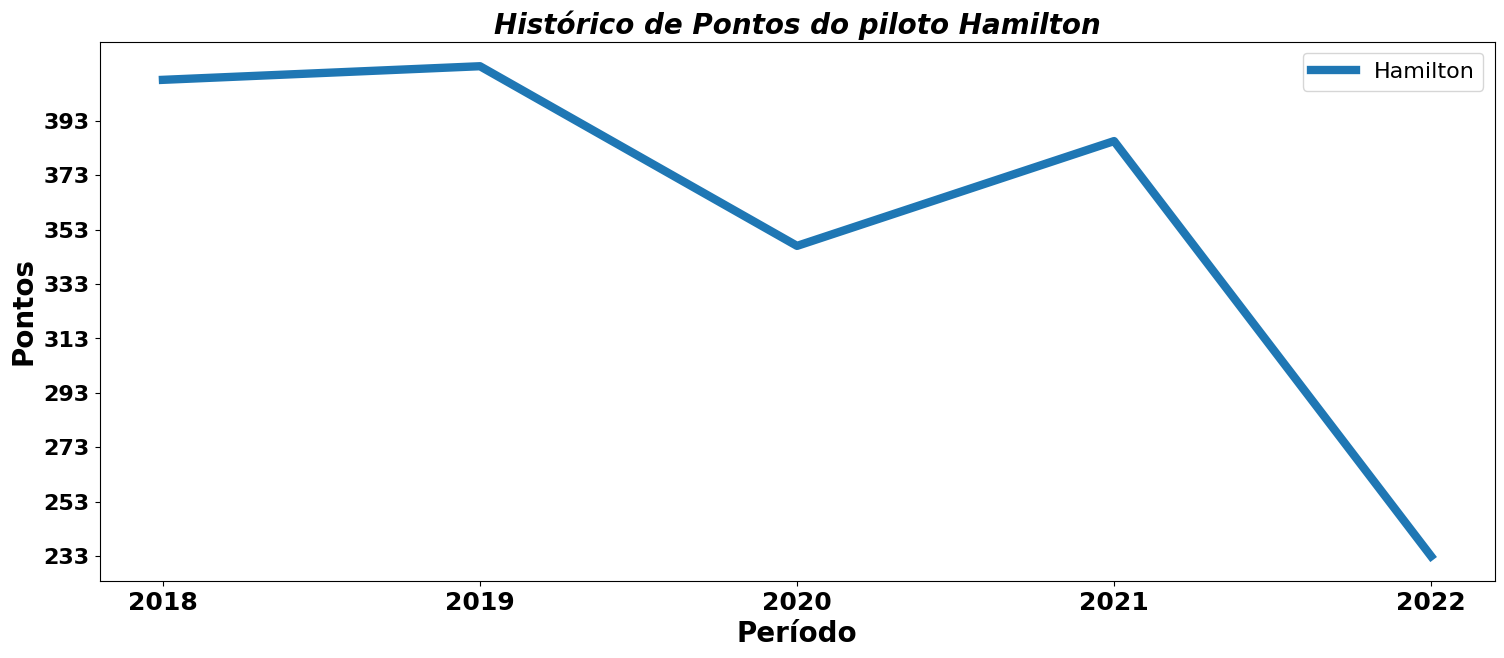

In [ ]:
#Estou trabalhando neste aqui
plt.subplots(figsize = (18, 7))
plt.xticks([0, 2018,2019,2020,2021,2022], fontweight='bold', fontsize='18')
plt.yticks(np.arange(min(data_HAM.Total_Pontos), max(data_HAM.Total_Pontos),  20.0), fontweight='bold',fontsize='16')


#dados
#plt.style.format({'data.Total_Pontos':'{:,.0F}'})
plt.plot(data_HAM.year, data_HAM.Total_Pontos, label='Hamilton', lw = 6)

plt.xlabel('Período', fontsize=20, fontweight='bold')
plt.ylabel('Pontos', fontsize=20, fontweight='bold')
plt.title('Histórico de Pontos do piloto Hamilton', fontsize=20, fontweight='bold',fontstyle='italic')
plt.legend(fontsize=16)
plt.style.use('ggplot') 
plt.show()

###**Análise Exploratória por piloto Verstappen**

In [ ]:
#Estatísticas Dataset Verstappen
train_VER.describe()

,raceId,year,round,circuitId,driverId,points
count,103.000000,103.000000,103.000000,103.000000,103.0,103.000000
mean,1041.601942,2020.029126,10.883495,29.135922,830.0,15.169903
std,31.599311,1.451546,6.100950,26.670851,0.0,8.930712
min,989.000000,2018.000000,1.000000,1.000000,830.0,0.000000
25%,1014.500000,2019.000000,6.000000,9.000000,830.0,10.000000
50%,1040.000000,2020.000000,11.000000,18.000000,830.0,18.000000
75%,1069.500000,2021.000000,16.000000,54.000000,830.0,25.000000
max,1096.000000,2022.000000,22.000000,79.000000,830.0,26.000000


In [ ]:
#Valores Nulos dataset Verstappen
train_VER.isnull().sum()

raceId       0
year         0
round        0
circuitId    0
date         0
driverId     0
points       0
rank         0
code         0
forename     0
dtype: int64

In [ ]:
#Total de pontos por Piloto no período de 2018 a 2022
func = lambda x: x.points.sum()/x.year.nunique()
data_VER = train_VER[train_VER['forename'].isin(train_VER.forename)].groupby('year') \
.apply(func).sort_values(ascending=False).reset_index(name = 'Total_Pontos')
data_VER = data_VER.sort_values(by=['year'], axis=0)
data_VER.head(10)

,year,Total_Pontos
3,2018,249.0
2,2019,278.0
4,2020,214.0
1,2021,388.5
0,2022,433.0


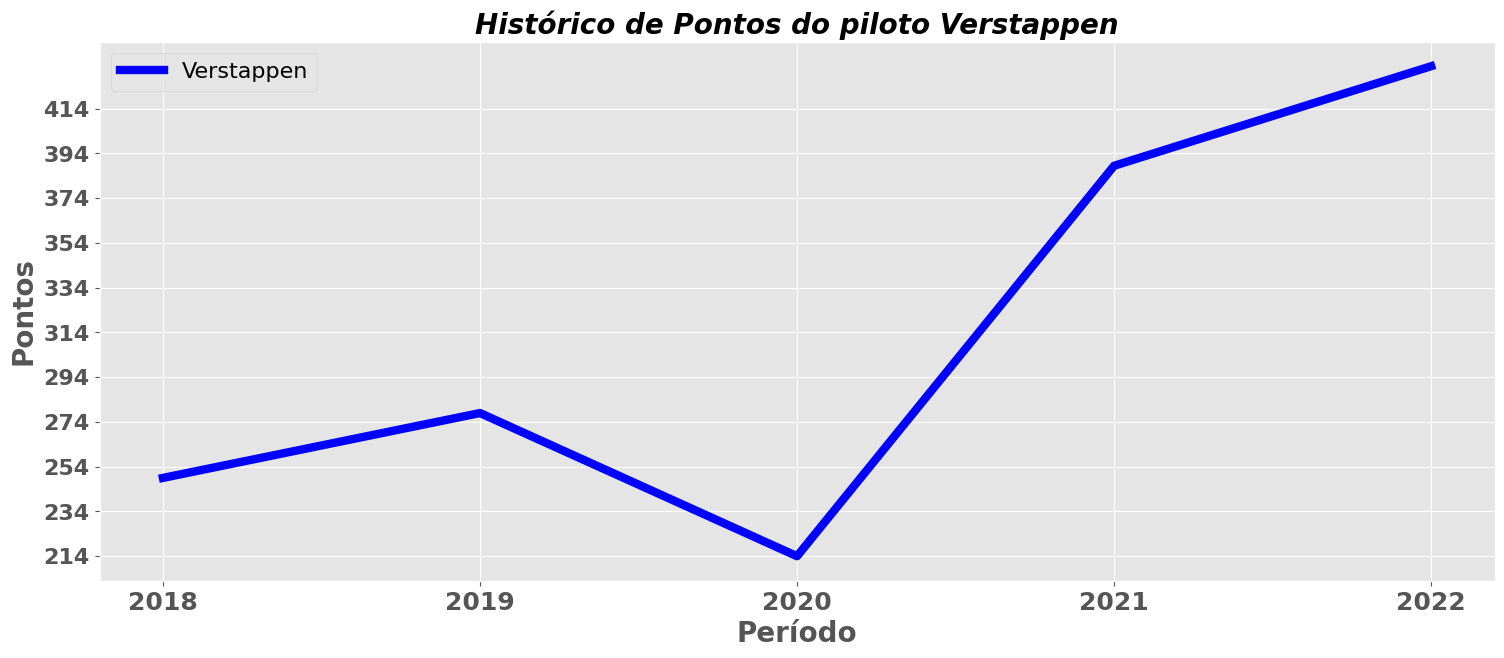

In [ ]:
#Estou trabalhando neste aqui
plt.subplots(figsize = (18, 7))
plt.xticks([0, 2018,2019,2020,2021,2022], fontweight='bold', fontsize='18')
plt.yticks(np.arange(min(data_VER.Total_Pontos), max(data_VER.Total_Pontos),  20.0), fontweight='bold',fontsize='16')


#dados
#plt.style.format({'data.Total_Pontos':'{:,.0F}'})
plt.plot(data_VER.year, data_VER.Total_Pontos, label='Verstappen', lw = 6, color='blue')

plt.xlabel('Período', fontsize=20, fontweight='bold')
plt.ylabel('Pontos', fontsize=20, fontweight='bold')
plt.title('Histórico de Pontos do piloto Verstappen', fontsize=20, fontweight='bold',fontstyle='italic')
plt.legend(fontsize=16)
plt.style.use('ggplot') 
plt.show()

###**Análise Exploratória por piloto Bottas**

In [ ]:
#Estatísticas Dataset Bottas
train_BOT.describe()

,raceId,year,round,circuitId,driverId,points
count,103.000000,103.000000,103.000000,103.000000,103.0,103.000000
mean,1041.601942,2020.029126,10.883495,29.135922,822.0,10.310680
std,31.599311,1.451546,6.100950,26.670851,0.0,8.069586
min,989.000000,2018.000000,1.000000,1.000000,822.0,0.000000
25%,1014.500000,2019.000000,6.000000,9.000000,822.0,0.000000
50%,1040.000000,2020.000000,11.000000,18.000000,822.0,10.000000
75%,1069.500000,2021.000000,16.000000,54.000000,822.0,18.000000
max,1096.000000,2022.000000,22.000000,79.000000,822.0,26.000000


In [ ]:
#Valores Nulos dataset Bottas
train_BOT.isnull().sum()

raceId       0
year         0
round        0
circuitId    0
date         0
driverId     0
points       0
rank         0
code         0
forename     0
dtype: int64

In [ ]:
#Total de pontos por Piloto no período de 2018 a 2022
func = lambda x: x.points.sum()/x.year.nunique()
data_BOT = train_BOT[train_BOT['forename'].isin(train_BOT.forename)].groupby('year') \
.apply(func).sort_values(ascending=False).reset_index(name = 'Total_Pontos')
data_BOT = data_BOT.sort_values(by=['year'], axis=0)
data_BOT.head(10)

,year,Total_Pontos
1,2018,247.0
0,2019,326.0
2,2020,223.0
3,2021,219.0
4,2022,47.0


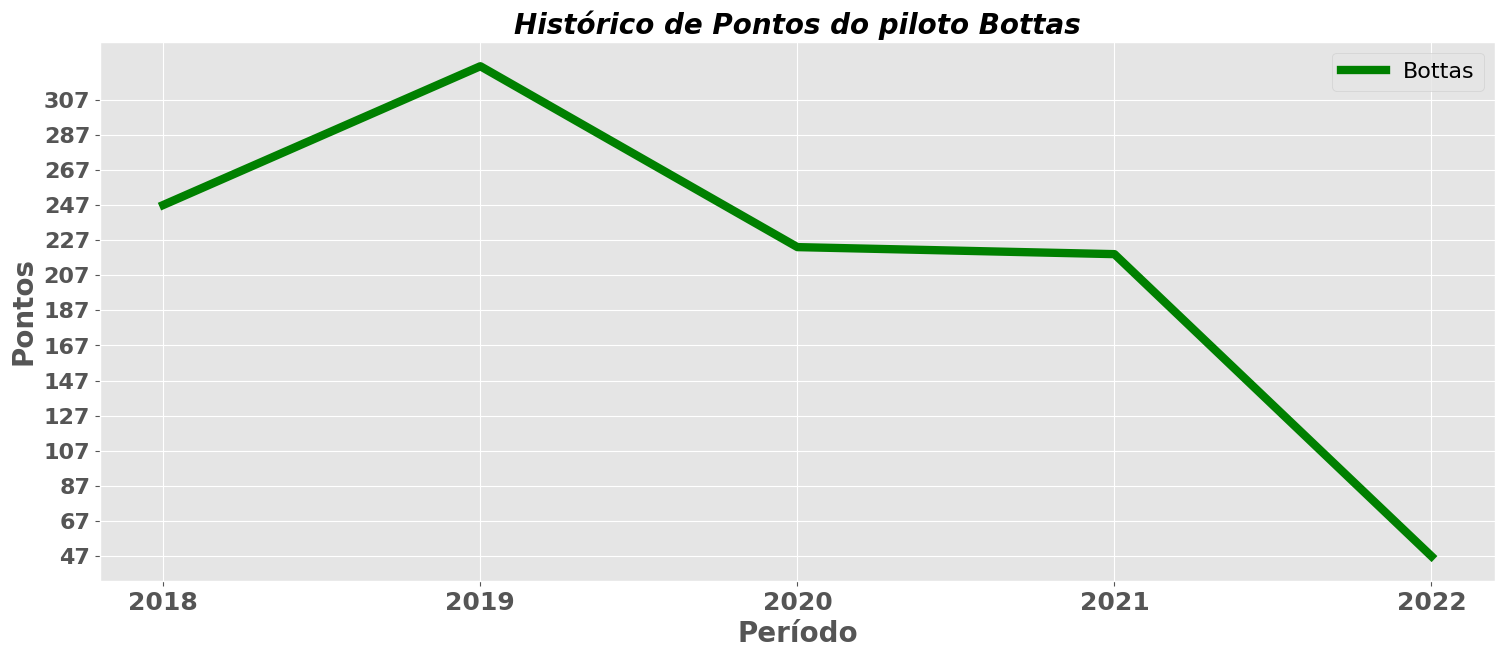

In [ ]:
#Estou trabalhando neste aqui
plt.subplots(figsize = (18, 7))
plt.xticks([0, 2018,2019,2020,2021,2022], fontweight='bold', fontsize='18')
plt.yticks(np.arange(min(data_BOT.Total_Pontos), max(data_BOT.Total_Pontos),  20.0), fontweight='bold',fontsize='16')


#dados
#plt.style.format({'data.Total_Pontos':'{:,.0F}'})
plt.plot(data_BOT.year, data_BOT.Total_Pontos, label='Bottas', lw = 6, color='green')

plt.xlabel('Período', fontsize=20, fontweight='bold')
plt.ylabel('Pontos', fontsize=20, fontweight='bold')
plt.title('Histórico de Pontos do piloto Bottas', fontsize=20, fontweight='bold',fontstyle='italic')
plt.legend(fontsize=16)
plt.style.use('ggplot') 
plt.show()

###**Análise dos 3 melhores pilotos em conjunto do ano de 2018 a 2022**

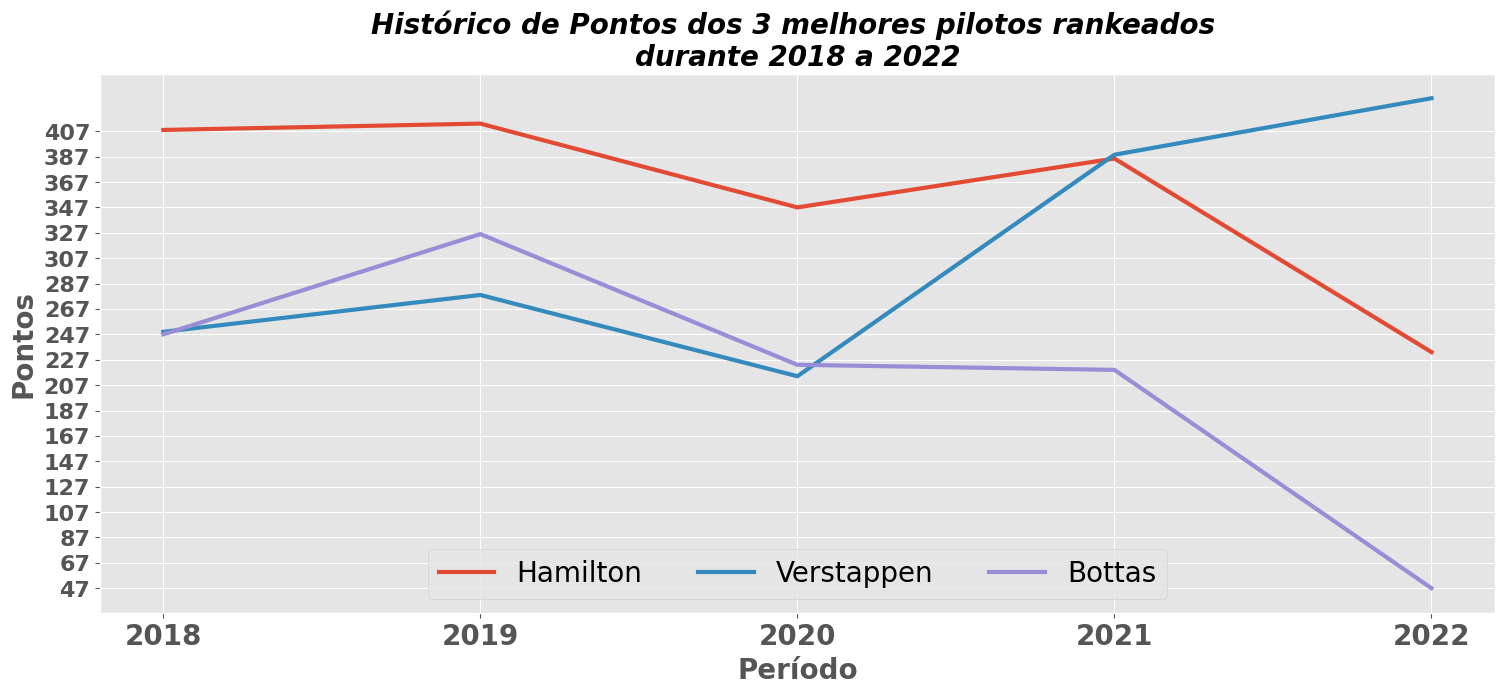

In [ ]:
#Estou trabalhando neste aqui
plt.subplots(figsize = (18, 7))
plt.xticks([0, 2018,2019,2020,2021,2022], fontweight='bold', fontsize='20')
plt.yticks(np.arange(min(data_BOT.Total_Pontos), max(data_HAM.Total_Pontos),  20.0), fontweight='bold',fontsize='16')
plt.plot(data_HAM.year, data_HAM.Total_Pontos, label='Hamilton', lw = 3)
plt.plot(data_VER.year, data_VER.Total_Pontos, label='Verstappen', lw = 3)
plt.plot(data_BOT.year, data_BOT.Total_Pontos, label='Bottas', lw = 3)
plt.title('Histórico de Pontos dos 3 melhores pilotos rankeados \ndurante 2018 a 2022', fontsize=20, fontweight='bold',fontstyle='italic')
plt.xlabel('Período', fontsize=20, fontweight='bold')
plt.ylabel('Pontos', fontsize=20, fontweight='bold')
plt.legend(fontsize=20, loc='lower center', ncol=3)
plt.style.use('ggplot') 
plt.show()

In [ ]:
#CORRELAÇÃO DE PEARSON
train.corr()

<ipython-input-72-0bc27f030cd9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,raceId,year,round,circuitId,driverId,points
raceId,1.000000,0.980052,0.223769,0.116824,0.090102,-0.000728
year,0.980052,1.000000,0.036920,0.111829,0.092050,-0.000568
round,0.223769,0.036920,1.000000,0.105176,0.000484,-0.000973
circuitId,0.116824,0.111829,0.105176,1.000000,0.006387,0.002383
driverId,0.090102,0.092050,0.000484,0.006387,1.000000,-0.161823
points,-0.000728,-0.000568,-0.000973,0.002383,-0.161823,1.000000


<ipython-input-73-3ca9276e727e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



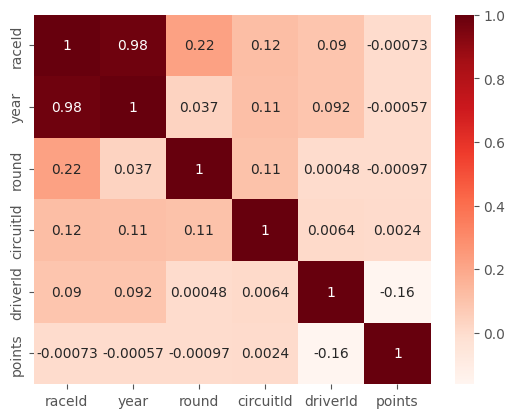

In [ ]:
#Função para criação do mapa de correlação de pearson entre os resultados dos pilotos
sns.heatmap(train.corr(),annot = True, cmap='Reds'); 

###**Modelo Machine Learning com facebook Prophet**

In [ ]:
#instalei a biblioteca com !pip install prophet
from prophet import Prophet
from sklearn import metrics

**Predição para o piloto Hamilton**

In [ ]:
#setando o Dataframe para esta análise
dt_ham = train_HAM
dt_ham.head()

,raceId,year,round,circuitId,date,driverId,points,rank,code,forename
101,989,2018,1,1,2018-03-25,1,18.0,3,HAM,Lewis
102,990,2018,2,3,2018-04-08,1,15.0,2,HAM,Lewis
103,991,2018,3,17,2018-04-15,1,12.0,4,HAM,Lewis
104,992,2018,4,73,2018-04-29,1,25.0,2,HAM,Lewis
105,993,2018,5,4,2018-05-13,1,25.0,3,HAM,Lewis


In [ ]:
#Remoção das colunas não utilizadas dos dados
dt_ham_prophet = dt_ham.drop(columns = ["raceId", "year", "circuitId", "round", "driverId", "rank", "code", "forename"])
dt_ham_prophet.head()

,date,points
101,2018-03-25,18.0
102,2018-04-08,15.0
103,2018-04-15,12.0
104,2018-04-29,25.0
105,2018-05-13,25.0


In [ ]:
#Renomeia as colunas 'points' para 'y' e 'Date' para 'ds'
dt_ham_prophet = pd.DataFrame({"ds": dt_ham.date, "y": dt_ham.points})
dt_ham_prophet.reset_index(drop = True, inplace = True)
dt_ham_prophet.head()

,ds,y
0,2018-03-25,18.0
1,2018-04-08,15.0
2,2018-04-15,12.0
3,2018-04-29,25.0
4,2018-05-13,25.0


In [ ]:
#Ordenar a coluna de datas
dt_ham_prophet.sort_values('ds', inplace=True)
dt_ham_prophet.head()

,ds,y
0,2018-03-25,18.0
1,2018-04-08,15.0
2,2018-04-15,12.0
3,2018-04-29,25.0
4,2018-05-13,25.0


In [ ]:
#Utilizei o index para poder gerar o plot >>>> só utilize para rodar o plot. 
dt_ham_prophet.set_index('ds', inplace=True)

<Axes: xlabel='ds'>

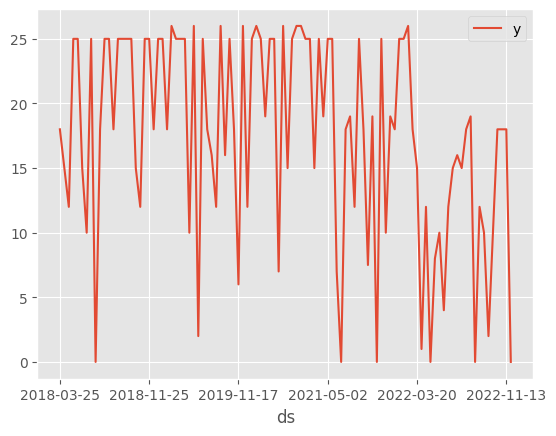

In [ ]:
#Plotando um gráfico por dia para o dataframe
dt_ham_prophet.plot()

In [ ]:
#Renomeia as colunas 'points' para 'y' e 'Date' para 'ds' >>>>>>>Rodo novamente para atender o plot acima e já fica preparado para o facebook prophet abaixo
dt_ham_prophet = pd.DataFrame({"ds": dt_ham.date, "y": dt_ham.points})
dt_ham_prophet.reset_index(drop = True, inplace = True)
dt_ham_prophet.head()

,ds,y
0,2018-03-25,18.0
1,2018-04-08,15.0
2,2018-04-15,12.0
3,2018-04-29,25.0
4,2018-05-13,25.0


In [ ]:
#Dividindo o conjunto para treino e teste
#Treino: 2018-03-25 a 2021-12-12
train_end_date = '2021-12-12'
#Teste: 2022-03-20 a 2022-07-31
test_end_date = '2022-11-13'
#dt_tes = dt_ham[(dt_ham['year']==2022)]  >>> utilize para filtrar por ano 
#dt_tes.head(100)

In [ ]:
#dividindo os dados em treinamento e teste
train_set = dt_ham_prophet.iloc[:-12]
test_set = dt_ham_prophet.iloc[-12:]

Criando o modelo

In [ ]:
#Utiliza a biblioteca Prophet para fazer a predição
prophet_model = Prophet(changepoint_prior_scale=0.05, interval_width=0.95, daily_seasonality=False)
prophet_model.fit(train_set)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps5hir635/z7b9_cxv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps5hir635/ddpk6bts.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14736', 'data', 'file=/tmp/tmps5hir635/z7b9_cxv.json', 'init=/tmp/tmps5hir635/ddpk6bts.json', 'output', 'file=/tmp/tmps5hir635/prophet_model26cd_mqw/prophet_model-20230423165451.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:54:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:54:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Fazendo previsão para o ano de 2023
y_pred = prophet_model.make_future_dataframe(periods=12, freq='M')
y_pred = prophet_model.predict(y_pred)

In [ ]:
#Mostra os dados da predição
y_pred['ds'].head(15)

0    2018-03-25
1    2018-04-08
2    2018-04-15
3    2018-04-29
4    2018-05-13
5    2018-05-27
6    2018-06-10
7    2018-06-24
8    2018-07-01
9    2018-07-08
10   2018-07-22
11   2018-07-29
12   2018-08-26
13   2018-09-02
14   2018-09-16
Name: ds, dtype: datetime64[ns]

Text(71.72222222222221, 0.5, 'Ponto Ganhos')

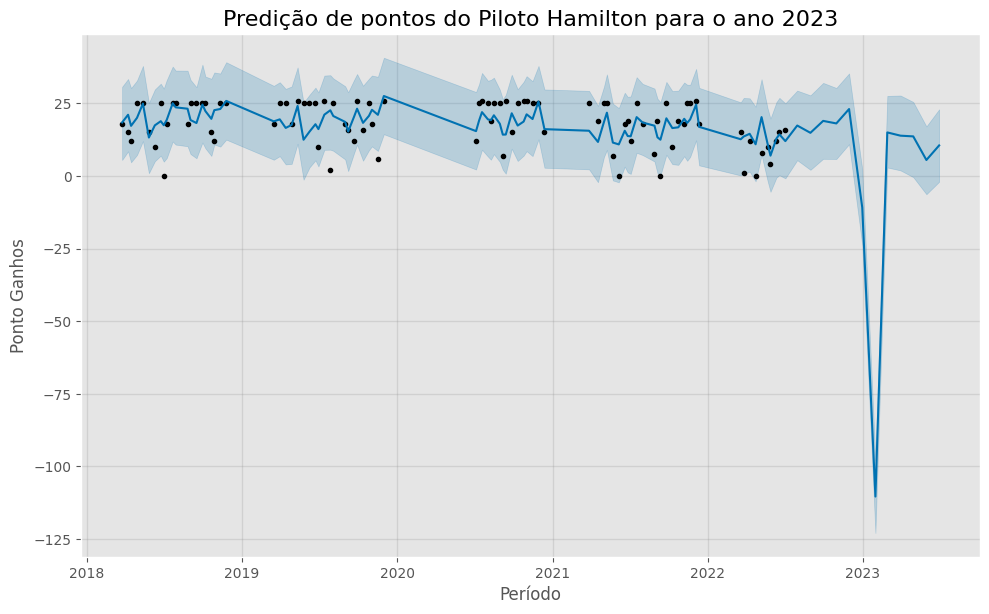

In [ ]:
#Plotagem do gráfico de previsão com os dados de treinamento 
fig = prophet_model.plot(y_pred)
ax1 = fig.gca()
ax1.set_title("Predição de pontos do Piloto Hamilton para o ano 2023", fontsize=16)
ax1.set_xlabel("Período", fontsize=12)
ax1.set_ylabel("Ponto Ganhos", fontsize=12)

In [ ]:
#Seleciona os dados previstos apenas para o período de teste
#train_end_date
y_pred = y_pred[y_pred['ds'] > train_end_date]
y_pred = y_pred.iloc[-12:]

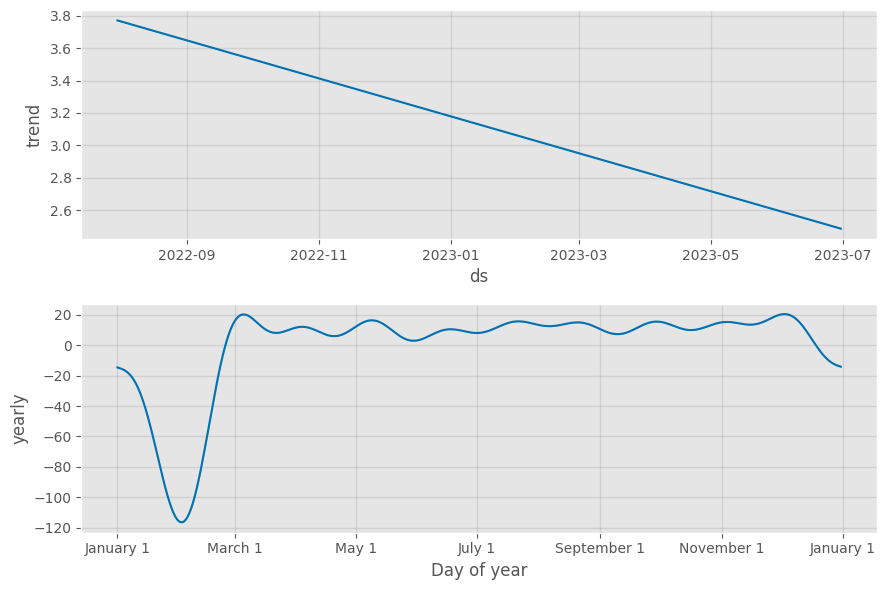

In [ ]:
#Plotagem dos componententes da predição para ver as tendências 
fig = prophet_model.plot_components(y_pred);

In [ ]:
#Valor Previsto
y_pred['yhat'].values

array([  17.39781135,   14.88586378,   18.99533264,   18.12419477,
         23.07943558,  -10.85994105, -110.40935682,   15.0239121 ,
         13.90406897,   13.65856518,    5.52744663,   10.54590465])

In [ ]:
#Valores do último ano
test_set['y'].values

array([15., 18., 19.,  0., 12., 10.,  2., 10., 18., 18., 18.,  0.])

In [ ]:
y_pred['ds'].values

array(['2022-07-31T00:00:00.000000000', '2022-08-31T00:00:00.000000000',
       '2022-09-30T00:00:00.000000000', '2022-10-31T00:00:00.000000000',
       '2022-11-30T00:00:00.000000000', '2022-12-31T00:00:00.000000000',
       '2023-01-31T00:00:00.000000000', '2023-02-28T00:00:00.000000000',
       '2023-03-31T00:00:00.000000000', '2023-04-30T00:00:00.000000000',
       '2023-05-31T00:00:00.000000000', '2023-06-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
test_set['ds'].values

array(['2022-07-10', '2022-07-24', '2022-07-31', '2022-08-28',
       '2022-09-04', '2022-09-11', '2022-10-02', '2022-10-09',
       '2022-10-23', '2022-10-30', '2022-11-13', '2022-11-20'],
      dtype=object)

In [ ]:
# Convertendo a coluna "data" para o tipo datetime
test_set['ds'] = pd.to_datetime(test_set['ds'])
test_set.sort_values('ds', inplace=True)

<ipython-input-94-4cb80f81090e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-94-4cb80f81090e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Rascunho para ver códigos de min e max em datas
min_data = train_set['ds'].min()
min_data
max_data = y_pred['ds'].max()
max_data 

Timestamp('2023-06-30 00:00:00')

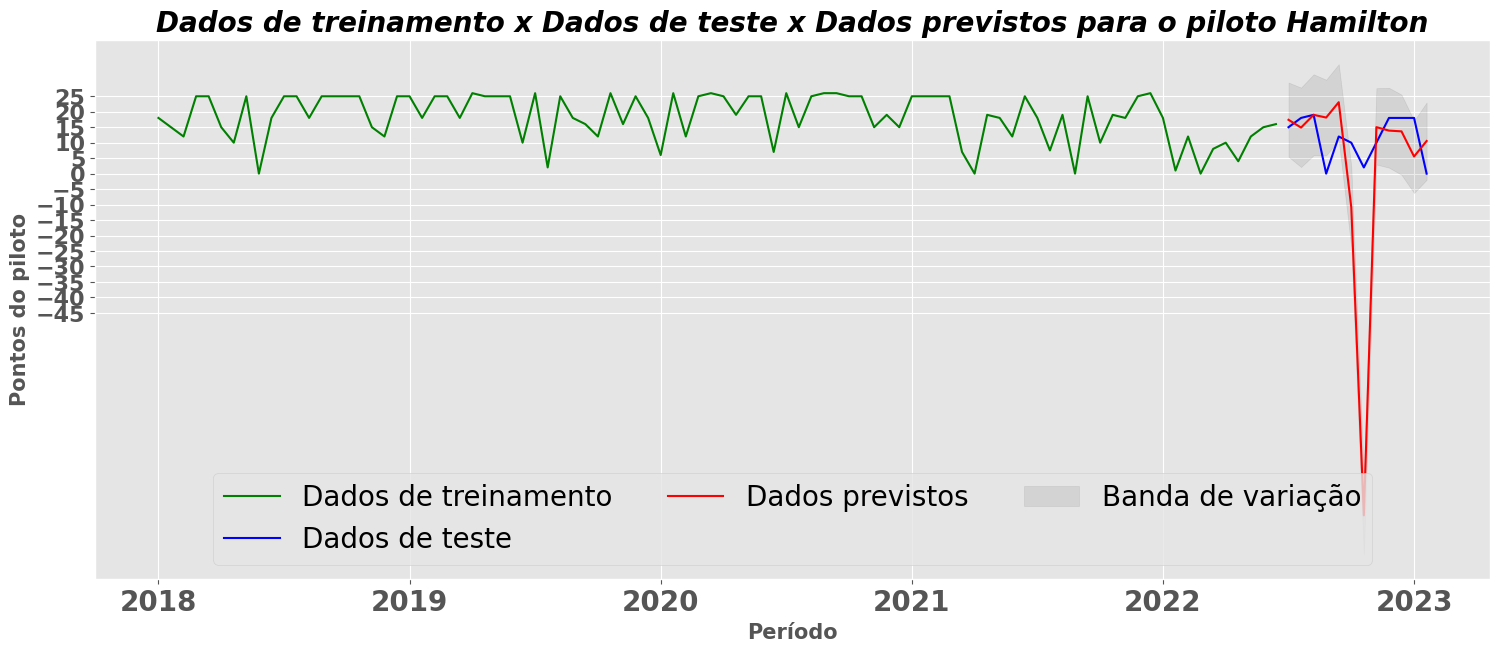

In [ ]:
#Plotagem do comparativo entre o preço previsto e o dataset
from textwrap import wrap
labels = ['2018', '2019', '2020', '2021', '2022', '2023']
labels = ['\n'.join(wrap(l, 4)) for l in labels]
n = train_set.shape[0]
plt.figure(figsize=(18,7))
plt.stacked=True
plt.title('Dados de treinamento x Dados de teste x Dados previstos para o piloto Hamilton', fontsize=20, fontweight='bold',fontstyle='italic')
plt.plot(train_set['y'], 'green', label='Dados de treinamento')
plt.plot(test_set['y'], color = 'blue', label='Dados de teste')
plt.plot(y_pred['yhat'], color = 'red', label = 'Dados previstos')
plt.fill_between(y_pred.index[-n:], y_pred['yhat_lower'][-n:], y_pred['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.legend(fontsize=20, loc='lower center', ncol=3)
#Esse aqui foi complicado, mas deu certo
plt.xticks(np.arange(0, 120, 20), labels, fontweight='bold', fontsize='20')
plt.yticks(np.arange(-45, 30, 5), fontweight='bold', fontsize='16')
plt.xlabel('Período', fontsize=15, fontweight='bold')
plt.ylabel("Pontos do piloto", fontsize=15, fontweight='bold')
plt.show(True)

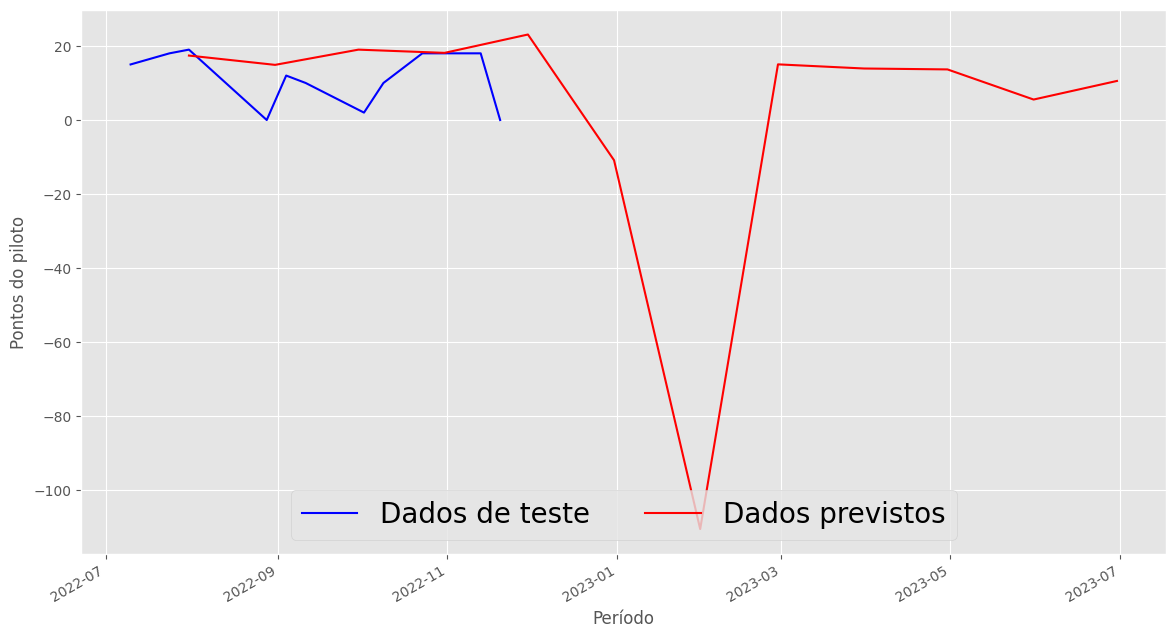

In [ ]:
#Plotagem do comparativo entre os dados de testes e dados previstos
plt.figure(figsize=(14,8))
test_set.set_index('ds')['y'].plot(color = 'blue', label="Dados de teste")
y_pred.set_index('ds')['yhat'].plot(color = 'red', label = "Dados previstos")
#talvez podemos ajusar os periodos para mostrar o ano de 2022 para 2023 somente
#plt.fill_between(y_pred.index[-n:], y_pred['yhat_lower'][-n:], y_pred['yhat_upper'][-n:], color='k', alpha=.08, label="Banda de variação")
plt.xlabel("Período")
plt.ylabel("Pontos do piloto")
plt.legend(fontsize=20, loc='lower center', ncol=3)
plt.grid(True)
plt.show()

In [ ]:
#Printando os resultados para o modelo Facebook Prophet
print('MAE: {}'.format(metrics.mean_absolute_error(test_set['y'].values, y_pred['yhat'].values)))
print('MSE: {}'.format(metrics.mean_squared_error(test_set['y'].values, y_pred['yhat'].values)))
print('RMSE: {}'.format(metrics.mean_squared_error(test_set['y'].values, y_pred['yhat'].values, squared=False)))

MAE: 17.039106592665224
MSE: 1155.4444523155464
RMSE: 33.991829199317095


###**Modelo Machine Learning com AUTO-ARIMA**

In [ ]:
#exclue colunas do dataset para trabalho
df_ham = dt_ham.drop(columns = ["raceId", "year", "circuitId", "round", "driverId", "rank", "code", "forename"])
df_ham.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 101 to 202
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    102 non-null    object 
 1   points  102 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
#tranforma em datetime 
df_ham.date = pd.to_datetime(df_ham.date)

In [ ]:
#listando o dataset df_ham
df_ham.head(2000)

,date,points
101,2018-03-25,18.0
102,2018-04-08,15.0
103,2018-04-15,12.0
104,2018-04-29,25.0
105,2018-05-13,25.0
...,...,...
198,2022-10-09,10.0
199,2022-10-23,18.0
200,2022-10-30,18.0
201,2022-11-13,18.0


In [ ]:
#para deixar o index zerado
df_ham = df_ham.reset_index(drop=True)

In [ ]:
#criando um dataset no range do dataset de uso e preenchendo com zero

# Define a data inicial e final
data_inicial = '2018-03-25'
data_final = '2022-11-20'

# Cria um array com as datas entre as datas inicial e final
date_rng = pd.date_range(start=data_inicial, end=data_final, freq='D')

# Cria um DataFrame com as datas e uma segunda coluna com zeros
df = pd.DataFrame(date_rng, columns=['date']).assign(points=np.zeros(len(date_rng)))


In [ ]:
df.head(2000)

,date,points
0,2018-03-25,0.0
1,2018-03-26,0.0
2,2018-03-27,0.0
3,2018-03-28,0.0
4,2018-03-29,0.0
...,...,...
1697,2022-11-16,0.0
1698,2022-11-17,0.0
1699,2022-11-18,0.0
1700,2022-11-19,0.0


In [ ]:
#descrevendo o dataset zerado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1702 non-null   datetime64[ns]
 1   points  1702 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.7 KB


In [ ]:
##loop para pegar dataset 1 (df) e 2 (df_ham) e juntar para melhor realizarmos o modelo arima 

# Iterar sobre as datas do DataFrame df_ham
for date in df_ham['date']:
    # Verificar se a data está presente no DataFrame df
    if date in df['date'].values:
        # Obter o índice da linha que contém a data
        index = df.index[df['date'] == date][0]
        # Atualizar o valor da coluna "points" na linha correspondente
        df.loc[index, 'points'] = df_ham.loc[df_ham['date'] == date, 'points'].iloc[0]


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1702 non-null   datetime64[ns]
 1   points  1702 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.7 KB


In [ ]:
df_ham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    102 non-null    datetime64[ns]
 1   points  102 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [ ]:
df.head(45)

,points
data,
2018-03-25,18.0
2018-03-26,0.0
2018-03-27,0.0
2018-03-28,0.0
2018-03-29,0.0
2018-03-30,0.0
2018-03-31,0.0
2018-04-01,0.0
2018-04-02,0.0


In [ ]:
df_ham.head(200)

,date,points
0,2018-03-25,18.0
1,2018-04-08,15.0
2,2018-04-15,12.0
3,2018-04-29,25.0
4,2018-05-13,25.0
...,...,...
97,2022-10-09,10.0
98,2022-10-23,18.0
99,2022-10-30,18.0
100,2022-11-13,18.0


In [ ]:
#mudar o nome da minha coluna de date para data
df.rename(columns={'date': 'data'}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1702 entries, 2018-03-25 to 2022-11-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   points  1702 non-null   float64
dtypes: float64(1)
memory usage: 26.6 KB


In [ ]:
#descreve o dataset
df.describe()

,points
count,1702.000000
mean,1.049647
std,4.589822
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,26.000000


<Axes: xlabel='data'>

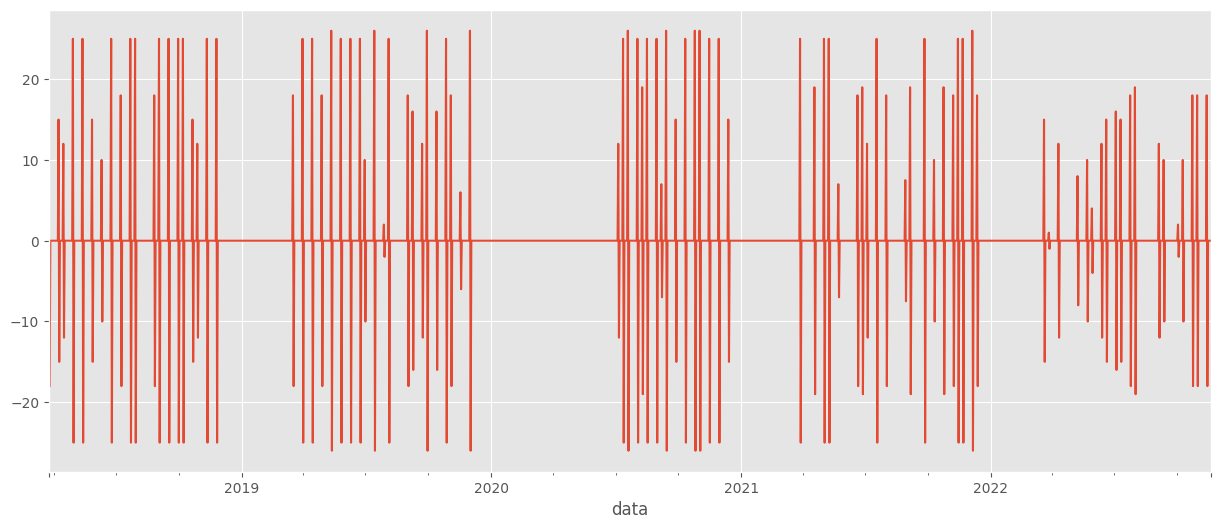

In [ ]:
#gráfico de diferença
df.points.diff().plot(figsize=(15,6))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1702 entries, 2018-03-25 to 2022-11-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   points  1702 non-null   float64
dtypes: float64(1)
memory usage: 26.6 KB


In [ ]:
#Escolha do período a ser utilizado no treinamento
train_start_date = '2018-03-25'
train_end_date = '2021-12-12'

#Escolha do período a ser utilizado nos testes. 
test_start_date = '2022-03-20'
test_end_date = '2022-11-20'

# OBS. O dataset abaixo será utilizado futuramente nos modelos de previsão

# Create boolean masks for the training and testing sets
train_mask = (df.index >= train_start_date) & (df.index <= train_end_date)
test_mask = (df.index >= test_start_date) & (df.index <= test_end_date)


#train_mask = (df_ham['date'] >= train_start_date) & (df_ham['date'] <= train_end_date)
#test_mask = (df_ham['date'] >= test_start_date) & (df_ham['date'] <= test_end_date)

# Use the masks to filter the dataset into the training and testing sets
train_data_ham = df.loc[train_mask]
test_data_ham = df.loc[test_mask]

# Print the training and testing sets
print("Training Set:\n", train_data_ham)
print("\nTesting Set:\n", test_data_ham)

Training Set:
             points
data              
2018-03-25    18.0
2018-03-26     0.0
2018-03-27     0.0
2018-03-28     0.0
2018-03-29     0.0
...            ...
2021-12-08     0.0
2021-12-09     0.0
2021-12-10     0.0
2021-12-11     0.0
2021-12-12    18.0

[1359 rows x 1 columns]

Testing Set:
             points
data              
2022-03-20    15.0
2022-03-21     0.0
2022-03-22     0.0
2022-03-23     0.0
2022-03-24     0.0
...            ...
2022-11-16     0.0
2022-11-17     0.0
2022-11-18     0.0
2022-11-19     0.0
2022-11-20     0.0

[246 rows x 1 columns]


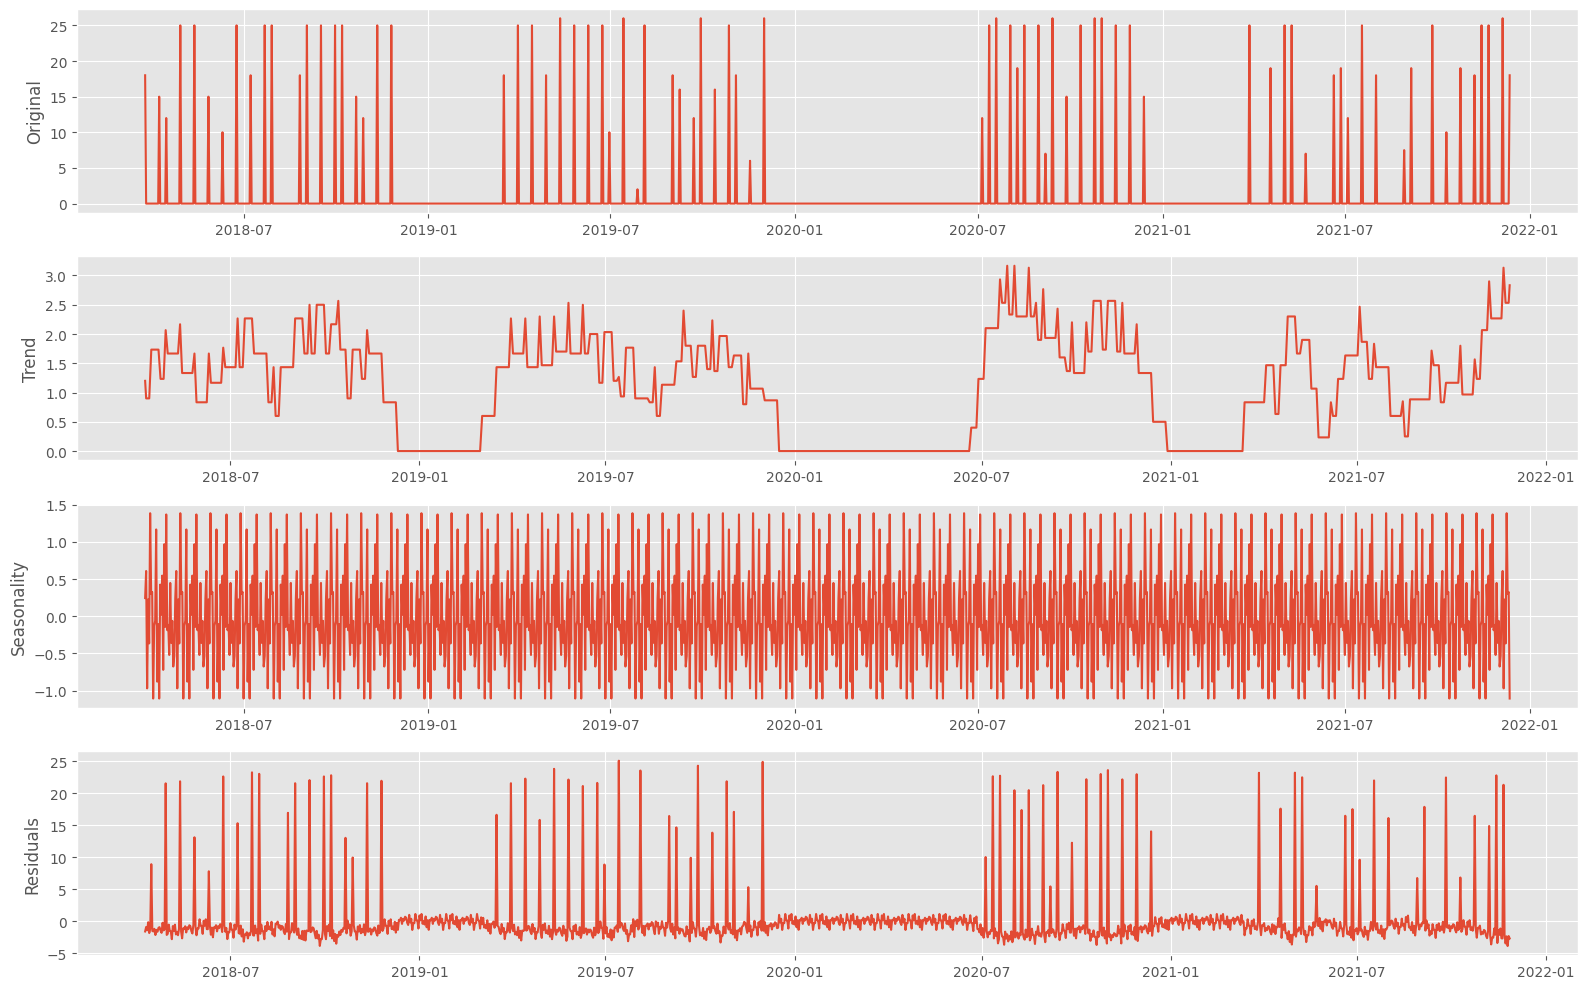

In [ ]:
##Decomposição da série temporal
decomposition = seasonal_decompose(train_data_ham, model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16,10))
plt.subplot(411)
plt.plot(train_data_ham)
plt.ylabel('Original')
plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')
plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonality')
plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

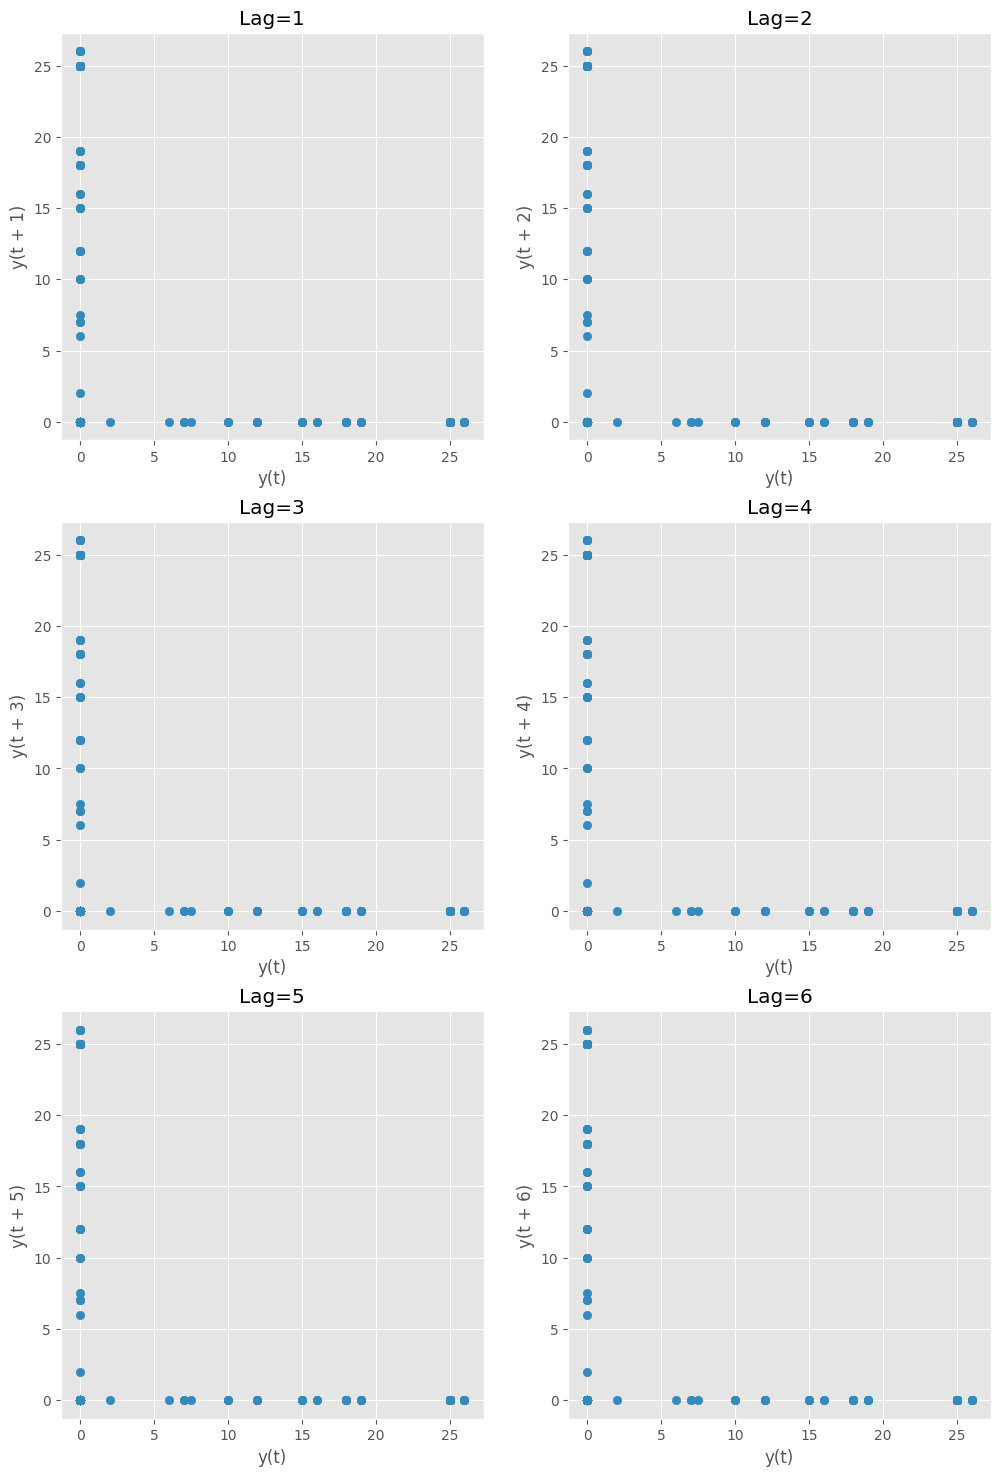

In [ ]:
#Plotagem da Autocorrelação
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
plt.title('Autocorrelação para pontos de Hamilton')

# Coordenadas dos eixos para plotagem
ax_idcs = [(0, 0),(0, 1),(1, 0),(1, 1),(2, 0),(2, 1)]
for lag, ax_coords in enumerate(ax_idcs, 1):
    ax_row, ax_col = ax_coords
    axis = axes[ax_row][ax_col]
    lag_plot(train_data_ham["points"], lag=lag, ax=axis)
    axis.set_title(f"Lag={lag}")
plt.show()

A plotagem da autocorrelação não é linear. Mas ainda sim será utilizado o modelo auto-arima para identificação do melhor modelo de forma automática.

In [ ]:
#Verificando a estacionalidade através da função abaixo: 
def adf_test(points):
    print('Resultado do Teste Dickey-Fuller:')
    dftest = adfuller(points, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=['Teste','Valor p', 'Nº de lags', 'Nº de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valor Crítico ({})'.format(key)] = value
    print(dfoutput)

adf_test(train_data_ham)

Resultado do Teste Dickey-Fuller:
Teste                    -5.044113
Valor p                   0.000018
Nº de lags               20.000000
Nº de observações      1338.000000
Valor Crítico (1%)       -3.435247
Valor Crítico (5%)       -2.863703
Valor Crítico (10%)      -2.567921
dtype: float64


Com o resultado do teste Dickey-Fuller e pela análise do gráfico, conclui-se que a série não é estacionária. Com isso, pode-se tentar diferenciar a série para transformá-la em estacionária.

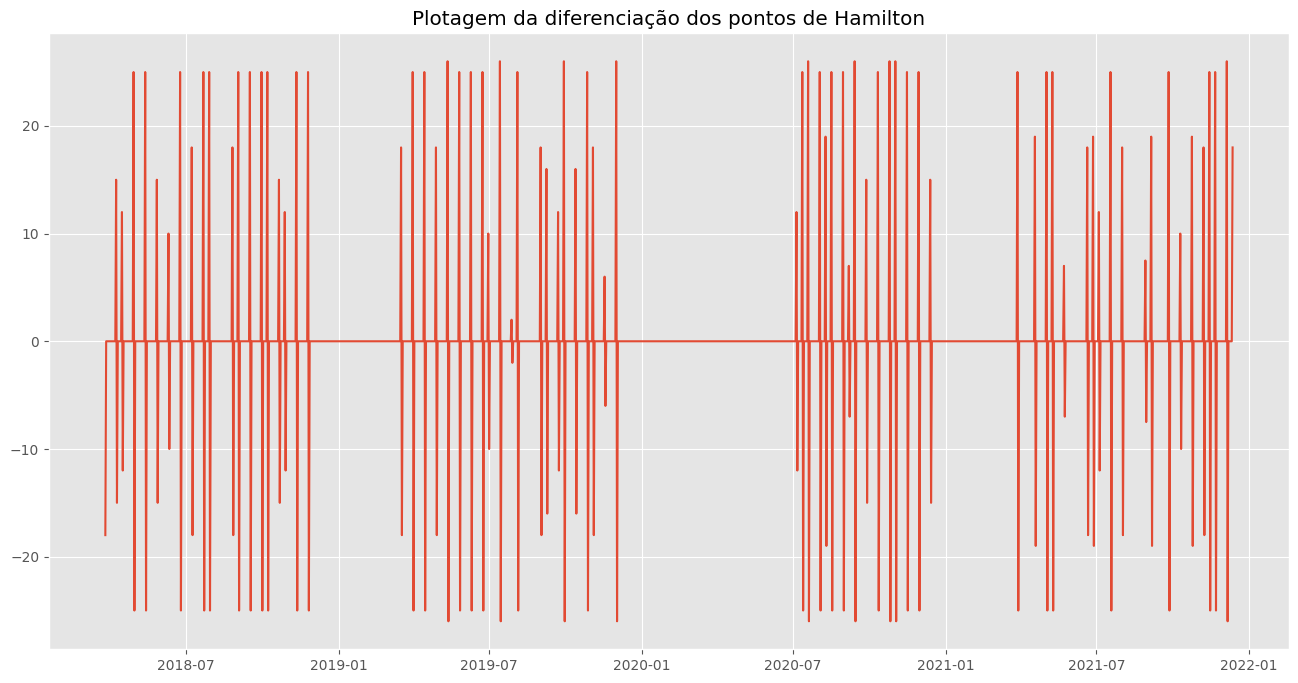

In [ ]:
#Aplicação da diferenciação
train_data_diff = train_data_ham - train_data_ham.shift()
train_data_diff.dropna(inplace=True)

#Plotagem da diferenciação de primeira ordem de pontos Hamilton
plt.figure(figsize=(16,8))
plt.plot(train_data_diff)
plt.title('Plotagem da diferenciação dos pontos de Hamilton')
plt.grid(True)

In [ ]:
#Teste de Dickey-Fuller para série diferenciada
adf_test(train_data_diff)

Resultado do Teste Dickey-Fuller:
Teste                 -1.698045e+01
Valor p                9.020505e-30
Nº de lags             1.900000e+01
Nº de observações      1.338000e+03
Valor Crítico (1%)    -3.435247e+00
Valor Crítico (5%)    -2.863703e+00
Valor Crítico (10%)   -2.567921e+00
dtype: float64


Com o resultado do teste Dickey-Fuller e pela análise do gráfico, conclui-se que a série é estacionária.

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



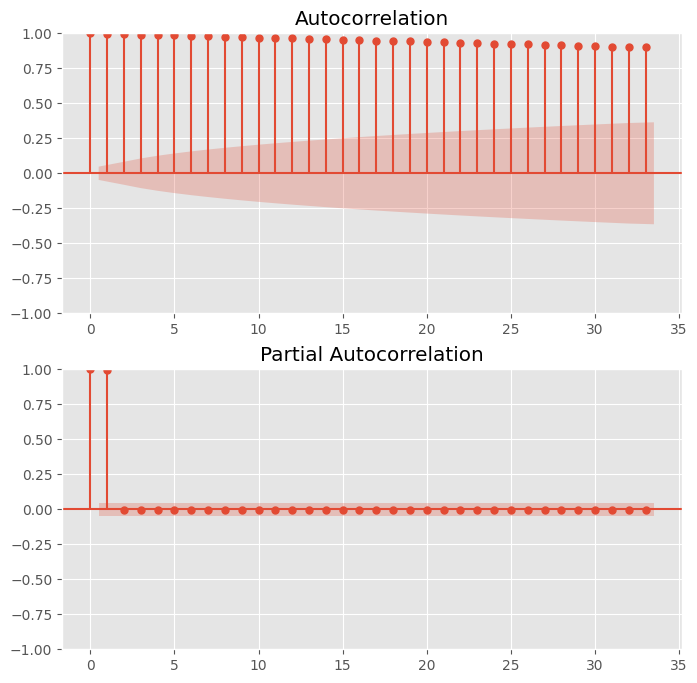

In [ ]:
#Plotagem dos gráficos ACF e PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(train_mask, ax = ax1)
plot_pacf(train_mask, ax = ax2)
plt.show()

In [ ]:
#Verifica data inicial e final da série temporal
test_data_ham.index.min(), test_data_ham.index.max()

(Timestamp('2022-03-20 00:00:00'), Timestamp('2022-11-20 00:00:00'))

In [ ]:
#Definição do modelo
model = pm.auto_arima(train_data_ham['points'], start_p=1, start_q=1,
                      #test='adf',       # usa o adftest para encontrar o melhor valor 'd'
                      max_p=3, max_q=3, # Máximo 'p' e 'q'
                      m=12,              # Frequência da série
                      d=1,           
                      stationary = False, #Estacionaridade
                      seasonal=True, #Sazonalidade
                      start_P=0, 
                      D=1, 
                      trace=True, #Se TRUE, a lista de modelos ARIMA considerados será reportada.
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True) #Se TRUE, fará a seleção gradual (mais rápido). Caso contrário, ele pesquisará todos os modelos.

#Treinamento do modelo
model.fit(train_data_ham['points'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=15.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10013.534, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9323.524, Time=0.90 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=9.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=9843.319, Time=0.31 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9151.313, Time=3.02 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=19.72 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=6.07 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9580.941, Time=2.37 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=9019.575, Time=3.80 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=9207.602, Time=1.15 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=28.84 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=11.90 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=8928.869, Time=3.93 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=9

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1359
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -4458.435
Date:                            Sun, 23 Apr 2023   AIC                           8928.869
Time:                                    17:52:15   BIC                           8960.098
Sample:                                03-25-2018   HQIC                          8940.566
                                     - 12-12-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8302      0.032    -25.745      0.000      -0.893      -0.767
ar.L2         -0.6091      0.038   

In [ ]:
#Verifica data inicial e final da série temporal
train_data_ham.index.min(), train_data_ham.index.max()

(Timestamp('2018-03-25 00:00:00'), Timestamp('2021-12-12 00:00:00'))

In [ ]:
#Faz a predição 
forecast_arima = model.predict(n_periods=len(test_data_ham.index))
forecast_arima = pd.DataFrame(forecast_arima, index = test_data_ham.index,columns=['Prediction'])
conf_int = model.predict(len(test_data_ham.index), return_conf_int=True, alpha = 0.05) #Pega o intervalo de confiança

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



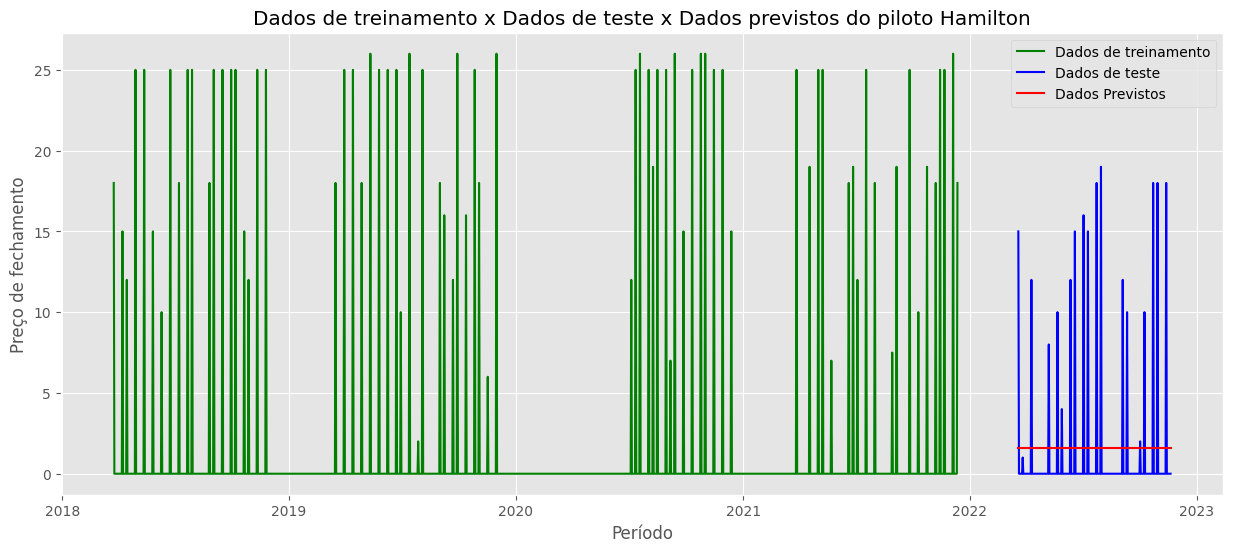

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
#
## ajustando um modelo ARIMA(1,1,1)
model = ARIMA(train_data_ham['points'], order=(1,1,1))
arima_model = model.fit()
#
# fazendo previsões com o modelo
predictions = arima_model.predict(start=test_data_ham.index[0], end=test_data_ham.index[-1], typ='levels')

# plotando os resultados
plt.figure(figsize=(15,6))
plt.title('Dados de treinamento x Dados de teste x Dados previstos do piloto Hamilton')
plt.plot(train_data_ham['points'], color='green', label = 'Dados de treinamento')
plt.plot(test_data_ham['points'], color = 'blue', label = 'Dados de teste')
#plt.fill_between(test_data_ham.index, conf_int[1][:,0], conf_int[1][:,1], color='k', alpha=.08)
plt.plot(predictions, color='red', label = 'Dados Previstos')
plt.xlabel('Período')
plt.ylabel('Preço de fechamento')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
forecast_arima.describe

<bound method NDFrame.describe of             Prediction
data                  
2022-03-20   30.003636
2022-03-21   38.625159
2022-03-22   31.829360
2022-03-23   43.263677
2022-03-24   30.849892
...                ...
2022-11-16         NaN
2022-11-17         NaN
2022-11-18         NaN
2022-11-19         NaN
2022-11-20         NaN

[246 rows x 1 columns]>

In [ ]:
# Substitui os valores nulos por zero na coluna 'prediction'
forecast_arima['Prediction'].fillna(0, inplace=True)

In [ ]:
import math
#from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcula o MSE e o MAE
mse = mean_squared_error(test_data_ham['points'], forecast_arima['Prediction'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_ham['points'], forecast_arima['Prediction'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_ham['points'], forecast_arima['Prediction']))
print('RMSE: '+str(rmse))

MSE: 1711.5378475852874
MAE: 31.589117061015155
RMSE: 41.37073660916962


###**Modelo preditivo com RNN com arquitetura LSTM (Long Short Term Memory)**

In [ ]:
#carregando os dados
train_ham_rnn = train_data_ham
test_ham_rnn = test_data_ham

In [ ]:
train_ham_rnn.head()

,points
data,
2018-03-25,18.0
2018-03-26,0.0
2018-03-27,0.0
2018-03-28,0.0
2018-03-29,0.0


In [ ]:
#Normalizando os dados
train_ham_lstm = train_ham_rnn.iloc[:,0:1].values #seleciona os pontos do piloto
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled_lstm = scaler.fit_transform(train_ham_lstm)
train_scaled_lstm


array([[0.69230769],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.69230769]])

In [ ]:
#criando estrutura de dados com 60 timesteps e uma saida que neste caso será os pontos do piloto
timesteps = 60
x_train_lstm = []
y_train_lstm = []
for i in range(timesteps, train_ham_lstm.shape[0]):
    x_train_lstm.append(train_scaled_lstm[i-timesteps:i, 0]) #Utilização de 60 timesteps anteriores
    y_train_lstm.append(train_scaled_lstm[i, 0]) #O 120º o ponto será o valor de y
x_train_lstm, y_train_lstm = np.array(x_train_lstm), np.array(y_train_lstm)

In [ ]:
#Fazendo o Reshaping o dataset de treinamento
#Sendo o segundo parâmetro como: 
       #x_train_lstm.shape[0] = batch_size, que é o número de pontos do piloto no período de treinamento
       #x_train_lstm.shape[1] = time_step, que é o número de pontos anteriores
       #input_dim = 1, que indica que será usado os pontos 
x_train_lstm = np.reshape(x_train_lstm, (x_train_lstm.shape[0], x_train_lstm.shape[1], 1))

In [ ]:
#Criando da LSTM utilizando a biblioteca Keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Inicialização da RNN
model_rnn = Sequential()

# Adiciona a primeira camada LSTM com o Dropout 
model_rnn.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train_lstm.shape[1], 1)))
model_rnn.add(Dropout(0.3))

# Adiciona a segunda camada LSTM com o Dropout
model_rnn.add(LSTM(units = 64))
model_rnn.add(Dropout(0.3))

# Adiciona a camada de saída 
model_rnn.add(Dense(units=1))

# Compila a RNN, neste caso utilizando o otimizador 'Adam'
model_rnn.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_absolute_error'])

# Faz o treinamento da RNN utilizando o dataset de treinamento
model_rnn.fit(x_train_lstm, y_train_lstm, epochs = 100, batch_size = 32) 

#Mostra o resumo do modelo
model_rnn.summary()

Epoch 1/100
41/41 [==============================] - 11s 125ms/step - loss: 0.0352 - mean_absolute_error: 0.0810
Epoch 2/100
41/41 [==============================] - 7s 181ms/step - loss: 0.0344 - mean_absolute_error: 0.0793
Epoch 3/100
41/41 [==============================] - 5s 129ms/step - loss: 0.0348 - mean_absolute_error: 0.0796
Epoch 4/100
41/41 [==============================] - 6s 139ms/step - loss: 0.0343 - mean_absolute_error: 0.0817
Epoch 5/100
41/41 [==============================] - 7s 166ms/step - loss: 0.0350 - mean_absolute_error: 0.0824
Epoch 6/100
41/41 [==============================] - 5s 124ms/step - loss: 0.0344 - mean_absolute_error: 0.0803
Epoch 7/100
41/41 [==============================] - 8s 185ms/step - loss: 0.0343 - mean_absolute_error: 0.0820
Epoch 8/100
41/41 [==============================] - 5s 126ms/step - loss: 0.0340 - mean_absolute_error: 0.0854
Epoch 9/100
41/41 [==============================] - 6s 149ms/step - loss: 0.0342 - mean_absolute_error

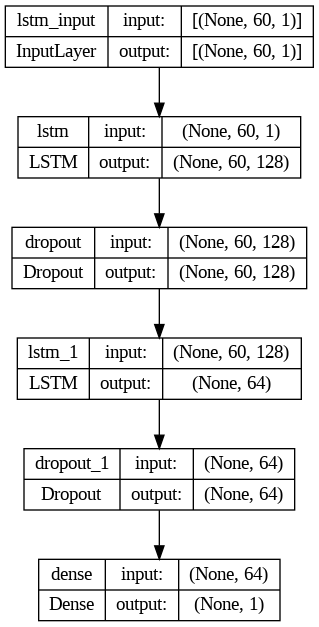

In [ ]:
#Visualizando o modelo
plot_model(model_rnn, show_shapes=True) 

In [ ]:
#Carregamentos dos dados de teste para fazer as predições
test_ham_lstm = test_ham_rnn.iloc[:,0:1].values #seleciona os pontos

In [ ]:
#convertendo para dataframe
train_ham_lstm = pd.DataFrame(train_ham_lstm, columns=['y'])
test_ham_lstm = pd.DataFrame(test_ham_lstm, columns=['y'])

# Concatena os data sets
combine = pd.concat((train_ham_lstm['y'], test_ham_lstm['y']), axis=0)

# Tratamento do conjunto de teste considerando os timesteps anteriores
test_inputs = combine[len(combine) - len(test_ham_lstm) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)

# Normalizando dos dados
test_inputs = scaler.transform(test_inputs)

In [ ]:
# Predição utilizando os dados de teste
x_test_lstm = []
for i in range(timesteps, test_ham_lstm.shape[0]+timesteps):
    x_test_lstm.append(test_inputs[i-timesteps:i, 0])
x_test_lstm = np.array(x_test_lstm)
x_test_lstm = np.reshape(x_test_lstm, (x_test_lstm.shape[0], x_test_lstm.shape[1], 1))
predictions_lstm = model_rnn.predict(x_test_lstm)

# Desnormalizando os dados
predictions_lstm = scaler.inverse_transform(predictions_lstm)

8/8 [==============================] - 1s 41ms/step


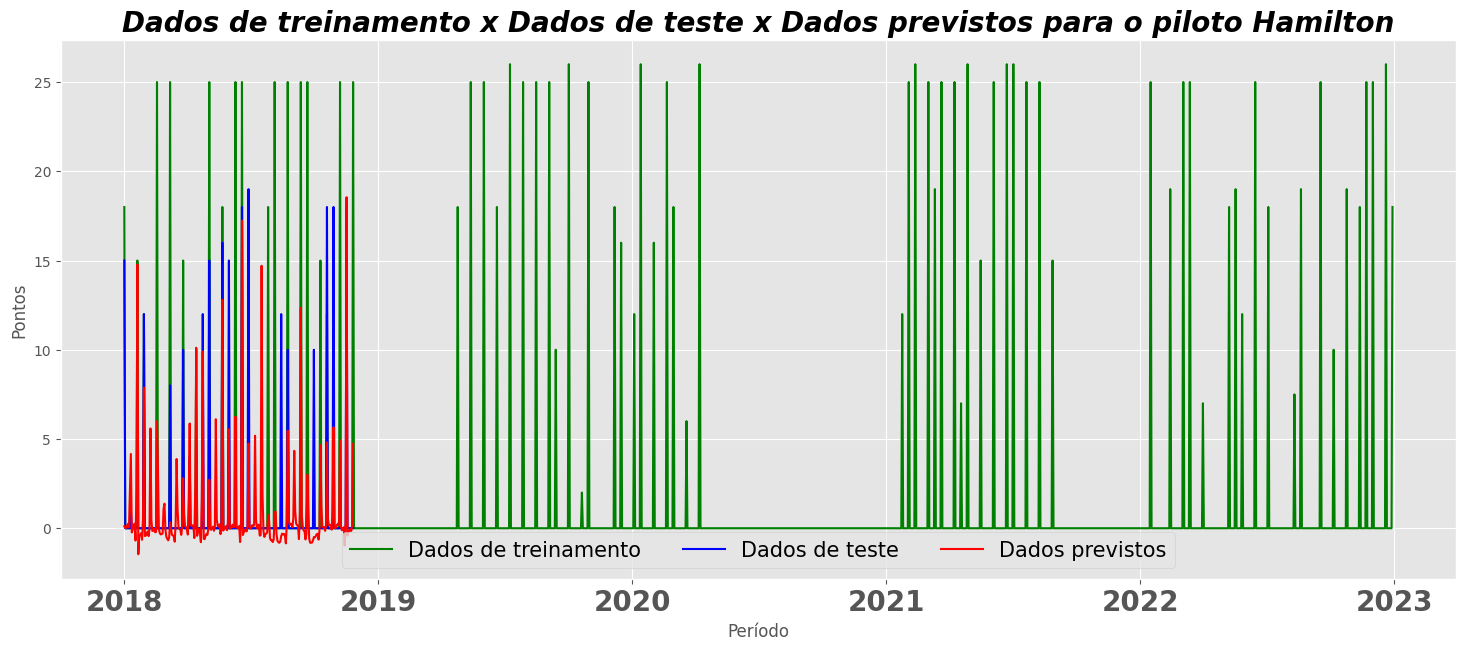

In [ ]:
#Plotando dados de treinamento, teste e previsão
from textwrap import wrap
labels = ['2018', '2019', '2020', '2021', '2022', '2023']
labels = ['\n'.join(wrap(l, 4)) for l in labels]
n = train_set.shape[0]
plt.figure(figsize=(18,7))
plt.stacked=True
plt.title('Dados de treinamento x Dados de teste x Dados previstos para o piloto Hamilton', fontsize=20, fontweight='bold',fontstyle='italic')
plt.plot(train_ham_lstm['y'].index, train_ham_lstm, color='green', label='Dados de treinamento')
plt.plot(test_ham_lstm['y'].index, test_ham_lstm, color='blue', label='Dados de teste')
plt.plot(test_ham_lstm['y'].index, predictions_lstm, color='red', label='Dados previstos')
# adicionando 30 períodos aos rótulos
plt.xticks(np.linspace(0, 1360, num=6), labels, fontweight='bold', fontsize='20')
plt.xlabel('Período')
plt.ylabel('Pontos')
plt.legend(fontsize=15, loc='lower center', ncol=3)
plt.grid(True)
#plt.xlim(right=len(labels)-1)
plt.xlim()
plt.show()

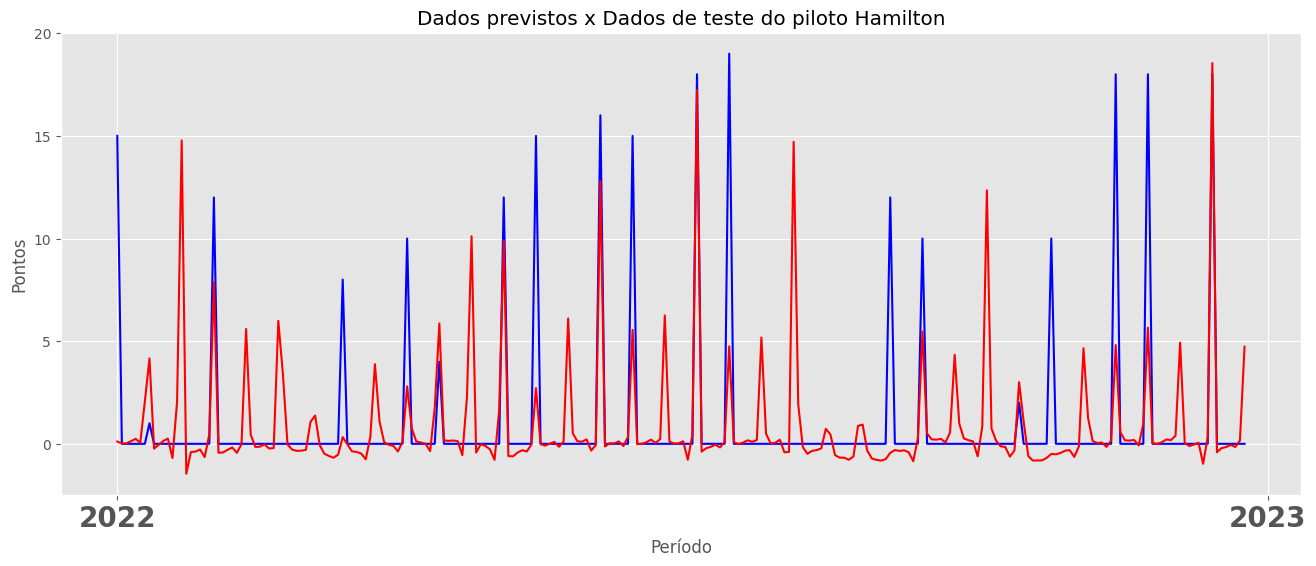

In [ ]:
#Plotagem dos dados de teste e dados previstos
#labels = ['2018', '2019', '2020', '2021', '2022', '2023']
#labels = ['\n'.join(wrap(l, 4)) for l in labels]
from textwrap import wrap
labels = ['2022', '2023']
labels = ['\n'.join(wrap(l, 4)) for l in labels]
plt.stacked=True
plt.figure(figsize=(16,6))
plt.plot(test_ham_lstm.index, test_ham_lstm, color = 'blue', label = 'Dados de teste')
plt.plot(test_ham_lstm.index, predictions_lstm, color = 'red', label = 'Dados previstos')
plt.title('Dados previstos x Dados de teste do piloto Hamilton')
plt.xlabel('Período')
plt.ylabel('Pontos')
plt.xticks(np.arange(0, 500, 250), labels, fontweight='bold', fontsize='20')
plt.grid(True)
plt.show()

In [ ]:
#Cálculo do erro
print('MAE: ', mean_absolute_error(test_ham_lstm,predictions_lstm))
print('MSE: ', mean_squared_error(test_ham_lstm,predictions_lstm))
print('RMSE: ', np.sqrt(mean_squared_error(test_ham_lstm,predictions_lstm)))

MAE:  1.310531280253355
MSE:  10.045841890554923
RMSE:  3.1695176116492747


### Códigos de Exemplo 

In [ ]:
## Criando um DataFrame de exemplo
#df_export = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
#df_export = df
#df_export.head()

In [ ]:
# Exportando o DataFrame para um arquivo Excel
df.to_excel('dataset_full_preenchido_com_0.xlsx', index=True)

In [ ]:
#Como fazer base de teste e treinamento. Guardar isso aqui para uso futuro
msk = np.random.rand(len(races_2018_2022_train)) < 0.8
train = races_2018_2022_train[msk]
test = races_2018_2022_train[~msk]

train.head() # 80%

In [ ]:
#modelo para ser utilizado quando necessário
#função lambda para retirar números quebrados
#dt_ham_prophet['y'] = dt_ham_prophet['y'].apply(lambda x: 0.1 if x <= 0 else x)

In [ ]:
#modelo para ser utilizado quando necessário
#mario_ham.groupby(mario_ham.index.year).sum().plot(figsize=(15, 6))

In [ ]:
# - Agrupando a coluna por nome do Construtor
best = team[['name','points','raceId']]
best = best.groupby('name')['raceId'].nunique().sort_values(ascending=False).reset_index(name = 'races')
best = best[best['races'] >= 100]
best.head()

In [ ]:
func = lambda x: x.points.sum()/x.forename.nunique()
data = train[train['forename'].isin(train.forename)].groupby('forename').apply(func).sort_values(ascending=False).reset_index(name = 'Total de pontos Geral de todos 5 anos')
data.head(10)